#Probability Theory Chapter 6: Large Random Samples
##Applications: Simulations

**Objectives**  
1) Simulate the normal distribution with varying number of samples using matplotlib  
2) Show that Central Limit Theorem (CLT) is a universal rule, regardless of the distribution  
3) Show the distribution of bivariate normal distributions by tweaking parameters  
4) Understand the delta method by exploring various possible functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def repeat_normal(n, num_trials):
  plot_list = []
  for i in range(num_trials):
    x = np.random.randn(n)
    plot_list.append(np.sum(x)/n)
  return plot_list


In [8]:
num_trials = 1000
n_list = [1, 10, 30, 100, 1000]
sim_list = []
for n in n_list:
  sim_list.append(repeat_normal(n, num_trials))

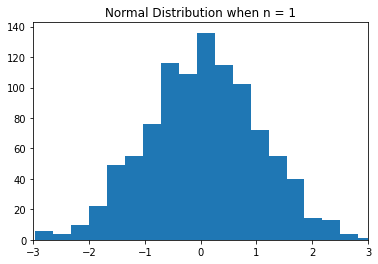

In [14]:
plt.hist(sim_list[0], bins = 20)
plt.title("Normal Distribution when n = 1")
axes = plt.gca()
axes.set_xlim([-3,3])
plt.show()


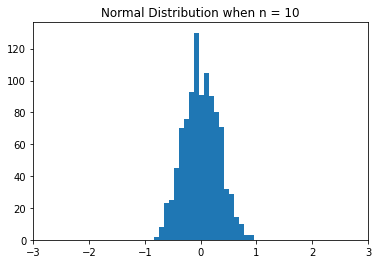

In [15]:
plt.hist(sim_list[1], bins = 20)
plt.title("Normal Distribution when n = 10")
axes = plt.gca()
axes.set_xlim([-3,3])
plt.show()

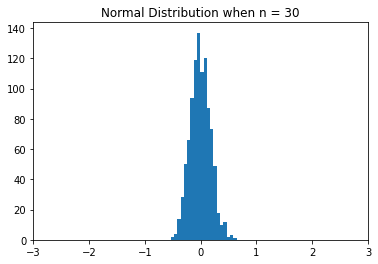

In [16]:
plt.hist(sim_list[2], bins = 20)
plt.title("Normal Distribution when n = 30")
axes = plt.gca()
axes.set_xlim([-3,3])
plt.show()

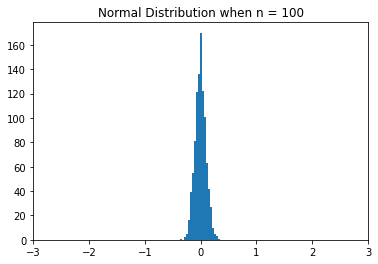

In [17]:
plt.hist(sim_list[3], bins = 20)
plt.title("Normal Distribution when n = 100")
axes = plt.gca()
axes.set_xlim([-3,3])
plt.show()

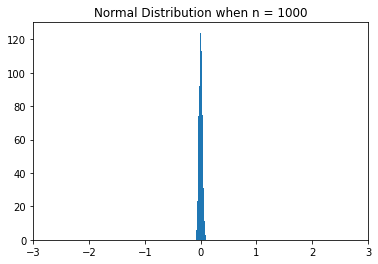

In [18]:
plt.hist(sim_list[4], bins = 20)
plt.title("Normal Distribution when n = 1000")
axes = plt.gca()
axes.set_xlim([-3,3])
plt.show()

As number of trials increase, you should expect that they become more clustered together. In other word, mean stays the same, but variance decreases proportional to square root of number of samples. But does this apply for other distribution, like exponential distribution?

In [32]:
def repeat_exp(n, num_trials):
  plot_list = []
  for i in range(num_trials):
    x = np.random.exponential(size=n)
    plot_list.append(np.mean(x))
  return plot_list

num_trials = 1000
n_list = [1, 10, 30, 100, 1000]
sim_list = []
for n in n_list:
  sim_list.append(repeat_exp(n, num_trials))

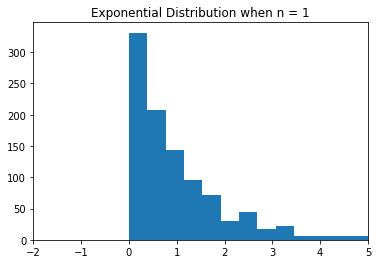

In [33]:
plt.hist(sim_list[0], bins = 20)
plt.title("Exponential Distribution when n = 1")
axes = plt.gca()
axes.set_xlim([-2,5])
plt.show()

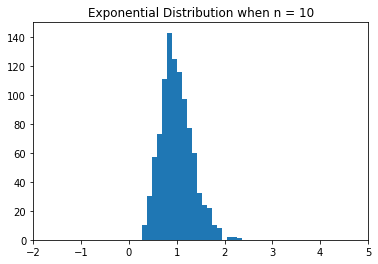

In [34]:
plt.hist(sim_list[1], bins = 20)
plt.title("Exponential Distribution when n = 10")
axes = plt.gca()
axes.set_xlim([-2,5])
plt.show()

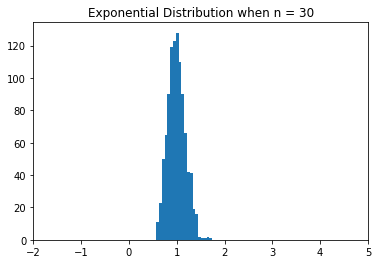

In [35]:
plt.hist(sim_list[2], bins = 20)
plt.title("Exponential Distribution when n = 30")
axes = plt.gca()
axes.set_xlim([-2,5])
plt.show()

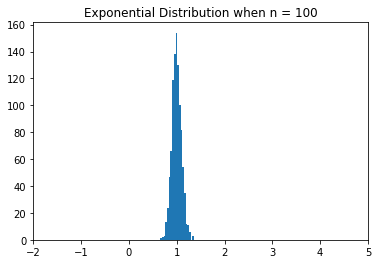

In [36]:
plt.hist(sim_list[3], bins = 20)
plt.title("Exponential Distribution when n = 100")
axes = plt.gca()
axes.set_xlim([-2,5])
plt.show()

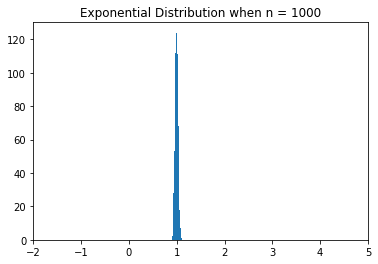

In [37]:
plt.hist(sim_list[4], bins = 20)
plt.title("Exponential Distribution when n = 1000")
axes = plt.gca()
axes.set_xlim([-2,5])
plt.show()

Central Limit Theorem (CLT) is a universal rule. It applies no matter what distribution you plug in.

In [38]:
from scipy.stats import multivariate_normal
mu = np.array([0, 0])
sigma = np.array([[1, 0], [0, 1]])
F = multivariate_normal(mu, sigma)

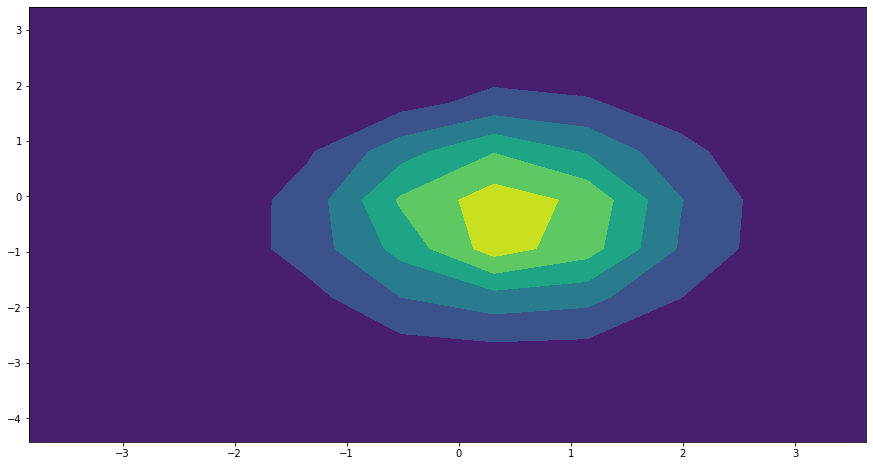

In [48]:
# Original code from https://stackoverflow.com/questions/53481961/contour-plot-of-multivariate-distribution

N = 10000

mean_a = [0, 0]
cov_a = [[1, 0], [0, 1]]

Xa = np.random.multivariate_normal(mean_a, cov_a, N)
fig, ax3 = plt.subplots(nrows=1,ncols=1,figsize=(15,8))

(counts, x_bins, y_bins) = np.histogram2d(Xa[:, 0], Xa[:, 1])
ax3.contourf(counts, extent=[x_bins[0], x_bins[-1], y_bins[0], y_bins[-1]])

You have seen how the contour map of bivariate normal distribution changes when we tweaked mean and covariance matrix parameters.

In [49]:
def delta_sim(array, func, derivative_func, mu):
  mean = np.mean(array)
  SD = np.std(array)/np.sqrt(len(array))
  const = derivative_func(mu)
  return (func(mean) - func(mu)) / (SD*const)


In [89]:
num_trials = 30
square_trials = []

for i in range(num_trials):
  random_trial = np.random.randn(1000) + 1
  square_trial = delta_sim(random_trial, lambda x: x**2, lambda x: 2*x, 1)
  square_trials.append(square_trial)


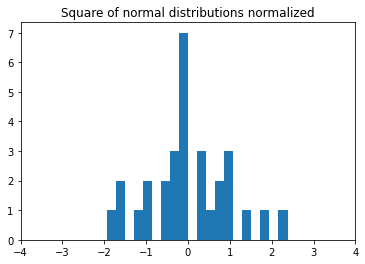

In [90]:
plt.hist(square_trials, bins = 20)
plt.title("Square of normal distributions normalized")
axes = plt.gca()
axes.set_xlim([-4,4])
plt.show()

In [72]:
square_trials = []

for i in range(num_trials):
  random_trial = np.random.exponential(scale = 1, size = 1000)
  square_trial = delta_sim(random_trial, lambda x: x**0.5, lambda x: 0.5*(x**(-0.5)), 1)
  square_trials.append(square_trial)

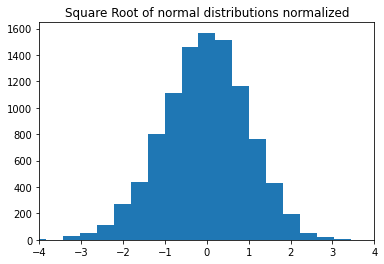

In [73]:
plt.hist(square_trials, bins = 20)
plt.title("Square Root of exponential distributions normalized")
axes = plt.gca()
axes.set_xlim([-4,4])
plt.show()

In [79]:
square_trials = []

for i in range(num_trials):
  random_trial = np.random.uniform(size = 1000)
  square_trial = delta_sim(random_trial, lambda x: np.log(x), lambda x: 1/x, 0.5)
  square_trials.append(square_trial)

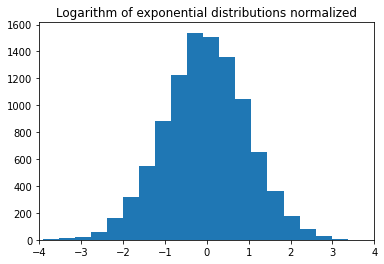

In [80]:
plt.hist(square_trials, bins = 20)
plt.title("Logarithm of exponential distributions normalized")
axes = plt.gca()
axes.set_xlim([-4,4])
plt.show()

You have seen that by applying delta method, we could get back approximately normal distribution whatever function we applied to the sample mean. The only condition is that the function should be differentiable. However, the rate that it converges to normal distribution could be slow for some distributions.